## Importing libraries and setting global variables

In [1]:
# Import usual library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

# Iterator library
import itertools as it


# Using this code bit only to make the notebook cleaner to read
# through. 
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
sns.set_palette('bright')

## Importing datasets

In [3]:
def read_train_test(status='train'):
    # Function to select dataset to read
    if status == 'train':
        df = pd.read_csv('./datasets/train.csv')
    elif status == 'test':
        df = pd.read_csv('./datasets/test.csv')
    else:
        print(f"Select the correct dataset")
    return df

In [4]:
# Select 'train' to read train.csv
# Select 'test' to read test.csv
df = read_train_test('train')

In [5]:
# View head
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [6]:
# Create a dictionary to rename columns
col_name_dict = {'Order':'Order', 'PID':'pid', 'MS SubClass':'ms_subclass', 'MS Zoning':'ms_zoning',
                 'Lot Frontage':'lot_frontage', 'Lot Area':'lot_area','Street':'street','Alley':'alley',
                 'Lot Shape':'lot_shape', 'Land Contour':'lot_contour', 'Utilities':'utilities',
                 'Lot Config':'lot_config', 'Land Slope':'lot_slope', 'Neighborhood':'neighborhood',
                 'Condition 1':'condition_1','Condition 2':'condition_2', 'Bldg Type':'building_type',
                 'House Style':'house_style', 'Overall Qual':'overall_quality','Overall Cond':'overall_condition',
                 'Year Built':'year_built', 'Year Remod/Add':'year_remodel', 'Roof Style':'roof_style',
                 'Roof Matl':'roof_material', 'Exterior 1st':'exterior_1', 'Exterior 2nd':'exterior_2',
                 'Mas Vnr Type':'masonry_type','Mas Vnr Area':'masonry_area', 'Exter Qual':'external_quality',
                 'Exter Cond':'external_condition', 'Foundation':'foundation', 'Bsmt Qual':'basement_quality',
                 'Bsmt Cond':'basement_condition', 'Bsmt Exposure':'basement_exposure',
                 'BsmtFin Type 1':'basement_fin_type_1', 'BsmtFin SF 1':'basement_fin_sf_1',
                 'BsmtFin Type 2':'basement_fin_type_2', 'BsmtFin SF 2':'basement_fin_sf_2',
                 'Bsmt Unf SF':'basement_unf_sf', 'Total Bsmt SF':'total_basement_sf','Heating':'heating',
                 'Heating QC':'heating_quality', 'Central Air':'central_air', 'Electrical':'electrical',
                 '1st Flr SF':'1st_floor_sf','2nd Flr SF':'2nd_floor_sf', 'Low Qual Fin SF':'low_quality_fin_sf',
                 'Gr Liv Area':'ground_living_sf', 'Bsmt Full Bath':'basement_full_bath',
                 'Bsmt Half Bath':'basement_half_bath', 'Full Bath':'full_bath', 'Half Bath':'half_bath',
                 'Bedroom AbvGr':'bedroom_above_ground','Kitchen AbvGr':'kitchen_above_ground',
                 'Kitchen Qual':'kitchen_quality', 'TotRms AbvGrd':'total_rooms_above_ground', 
                 'Functional':'functional','Fireplaces':'fireplace', 'Fireplace Qu':'fireplace_quality',
                 'Garage Type':'garage_type', 'Garage Yr Blt':'garage_year_built','Garage Finish':'garage_fin',
                 'Garage Cars':'garage_cars', 'Garage Area':'garage_area', 'Garage Qual':'garage_quality',
                 'Garage Cond':'garage_condition', 'Paved Drive':'paved_drive', 'Wood Deck SF':'wood_deck_sf',
                 'Open Porch SF':'open_porch_sf','Enclosed Porch':'enclosed_porch', '3Ssn Porch':'3ssn_porch',
                 'Screen Porch':'screen_porch', 'Pool Area':'pool_area', 'Pool QC':'pool_quality','Fence':'fence',
                 'Misc Feature':'misc_feature', 'Misc Val':'misc_value', 'Mo Sold':'month_sold',
                 'Yr Sold':'year_sold', 'Sale Type':'sale_type','Sale Condition':'sale_condition',
                 'SalePrice':'sale_price'}

In [7]:
# Rename columns
df = df.rename(columns=col_name_dict)

In [8]:
# Verify shape of df
df.shape

(2197, 82)

## Dealing with null values

#### Grouping of actionable columns

In [9]:
# Creating sets of actionable columns
fill_by_drop = []
fill_by_impute_na = []
fill_by_impute_0 = []
fill_by_impute_none = []
fill_by_impute_stats = []

In [10]:
# Check nulls values
df.isnull().mean()[df.isnull().sum() > 0].sort_values(ascending=False)

pool_quality           0.994538
misc_feature           0.963587
alley                  0.934911
fence                  0.809285
fireplace_quality      0.485207
lot_frontage           0.164770
garage_condition       0.055530
garage_quality         0.055530
garage_fin             0.055530
garage_year_built      0.055530
garage_type            0.054620
basement_exposure      0.031406
basement_fin_type_2    0.030951
basement_fin_type_1    0.030496
basement_quality       0.030496
basement_condition     0.030496
masonry_area           0.010014
masonry_type           0.010014
basement_half_bath     0.000455
basement_full_bath     0.000455
total_basement_sf      0.000455
basement_unf_sf        0.000455
garage_cars            0.000455
garage_area            0.000455
basement_fin_sf_2      0.000455
basement_fin_sf_1      0.000455
electrical             0.000455
dtype: float64

In [11]:
# 4 columns has over 80% of missing values (we can drop these)
# moving these columns to actionable list
fill_by_drop.extend(['pool_quality','misc_feature','alley','fence'])

In [12]:
# missing fireplace_quality means no fireplace at all - impute with 'None'
df.groupby(['fireplace_quality'],dropna=False)[['fireplace']].agg([pd.Series.mode,'count'])

fireplace      
                       mode count
fireplace_quality                
Ex                        1    30
Fa                        1    50
Gd                        1   564
Po                        1    33
TA                        1   454
NaN                       0  1066

In [13]:
# move fireplace_quality to columns to impute with 'None'
fill_by_impute_none.append('fireplace_quality')

In [14]:
# missing masonry area means no masonry - we can set to the mode 
# masonry_type impute None
# masonry_area impute 0
df.groupby(['masonry_type'],dropna=False)[['masonry_area']].agg([pd.Series.mode,'count'])

masonry_area      
                     mode count
masonry_type                   
BrkCmn              161.0    19
BrkFace             120.0   658
CBlock              198.0     1
None                  0.0  1307
Stone               186.0   190
NaN                    []     0

In [15]:
# moving masonry type to impute with none
fill_by_impute_none.append('masonry_type')
# moving masonry area to impute with 0
fill_by_impute_0.append('masonry_area')

In [16]:
# missing lot frontage
df.groupby(['lot_frontage'],dropna=False)[['lot_area','lot_shape','lot_config']].agg([pd.Series.mode,'count'])

lot_area       lot_shape       lot_config      
                       mode count      mode count       mode count
lot_frontage                                                      
21.0                   1680    34       Reg    34     Inside    34
24.0                   2280    32       Reg    32     Inside    32
25.0                   4835     1       IR1     1    CulDSac     1
26.0          [8773, 10943]     2       IR2     2        FR2     2
28.0                   7296     1       IR1     1    CulDSac     1
...                     ...   ...       ...   ...        ...   ...
182.0                 14572     1       IR3     1     Corner     1
195.0                 41600     1       IR1     1        FR2     1
200.0                 43500     1       Reg     1     Inside     1
313.0                 63887     1       IR3     1     Corner     1
NaN                    7500   362       IR1   362     Inside   362

[123 rows x 6 columns]

Mode lot area for missing lot frontage: 7500
Mode lot area for missing lot frontage: IR1
Mode lot frontage for 7500,IR1 : nan


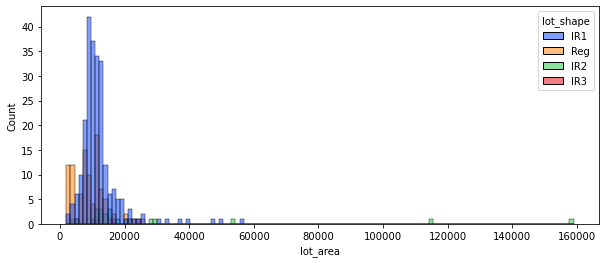

In [17]:
# Majority of missing values seems to be
# lot_shape = IR1
# lot_area = 7,500

print(f"Mode lot area for missing lot frontage: {df[df['lot_frontage'].isnull()]['lot_area'].mode()[0]}")
print(f"Mode lot area for missing lot frontage: {df[df['lot_frontage'].isnull()]['lot_shape'].mode()[0]}")

print(f"Mode lot frontage for 7500,IR1 : {df[(df['lot_area'] == 7500) & (df['lot_shape']=='IR1')]['lot_frontage'].mean()}")

fig, ax = plt.subplots(figsize=(10,4))

sns.histplot(x='lot_area',data=df[df['lot_frontage'].isnull()], hue='lot_shape');

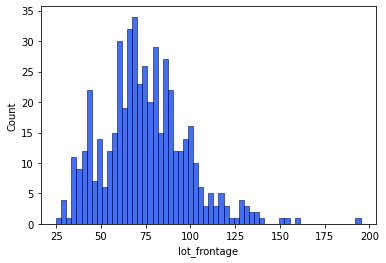

In [18]:
# Check lot_frontage corresponding to lot_area 7500, IR1
# Let's try to impute with lot_frontage missing with 74
# for lot_shape of IR1 and lot_area of approx. 7000

sns.histplot(x='lot_frontage', data = df[df['lot_shape']=='IR1'], bins=60);

In [19]:
# moving to impute with stats
fill_by_impute_stats.append('lot_frontage')

In [20]:
# everything is missing for the case of garage group - meaning no garage at all
df[df['garage_condition'].isnull()][['garage_type', 'garage_year_built', 'garage_fin', 'garage_cars',
       'garage_area', 'garage_quality', 'garage_condition']]

,garage_type,garage_year_built,garage_fin,garage_cars,garage_area,garage_quality,garage_condition
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
43,NaN,NaN,NaN,0.0,0.0,NaN,NaN
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
61,NaN,NaN,NaN,0.0,0.0,NaN,NaN
63,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2121,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2144,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2153,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2175,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [21]:
# move garage columns to impute with na
fill_by_impute_na.extend(['garage_type','garage_year_built','garage_fin','garage_quality','garage_condition'])

# move garage columns to impute with 0
fill_by_impute_0.extend(['garage_cars','garage_area'])

In [22]:
# check basement group 
# everything is missing for the case of basement group - meaning no basement at all
df[df['basement_exposure'].isnull()][['basement_quality', 'basement_condition', 'basement_exposure',
       'basement_fin_type_1', 'basement_fin_sf_1', 'basement_fin_type_2',
       'basement_fin_sf_2', 'basement_unf_sf', 'total_basement_sf',
       'basement_full_bath', 'basement_half_bath']]

,basement_quality,basement_condition,basement_exposure,basement_fin_type_1,basement_fin_sf_1,basement_fin_type_2,basement_fin_sf_2,basement_unf_sf,total_basement_sf,basement_full_bath,basement_half_bath
99,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
141,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
162,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
165,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
168,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2024,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2043,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2059,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [23]:
# move these columns to impute with na
fill_by_impute_na.extend(['basement_quality','basement_condition','basement_exposure','basement_fin_type_1',
                         'basement_fin_type_2'])

# move these columns to impute with 0
fill_by_impute_0.extend(['basement_fin_sf_1','basement_fin_sf_2','basement_unf_sf','basement_full_bath',
                         'basement_half_bath','total_basement_sf'])

In [24]:
# Utilities that is 'AllPub' can be impute with the mode of SBrkr
df.groupby(['utilities','electrical']).agg(['count'])[['Order']]

Order
                     count
utilities electrical      
AllPub    FuseA        128
          FuseF         38
          FuseP          6
          Mix            1
          SBrkr       2020
NoSeWa    FuseA          1
NoSewr    FuseA          2

In [25]:
# move electrical to impute with stats
fill_by_impute_stats.extend(['electrical'])

#### Executing cleaning methods

In [26]:
# Creating sets of actionable columns
print(f'drop: {fill_by_drop}')
print(f'na : {fill_by_impute_na}')
print(f'0 : {fill_by_impute_0}')
print(f'none : {fill_by_impute_none}')
print(f'stats : {fill_by_impute_stats}')

drop: ['pool_quality', 'misc_feature', 'alley', 'fence']
na : ['garage_type', 'garage_year_built', 'garage_fin', 'garage_quality', 'garage_condition', 'basement_quality', 'basement_condition', 'basement_exposure', 'basement_fin_type_1', 'basement_fin_type_2']
0 : ['masonry_area', 'garage_cars', 'garage_area', 'basement_fin_sf_1', 'basement_fin_sf_2', 'basement_unf_sf', 'basement_full_bath', 'basement_half_bath', 'total_basement_sf']
none : ['fireplace_quality', 'masonry_type']
stats : ['lot_frontage', 'electrical']


In [27]:
# looping to drop columns
for col in fill_by_drop:
    df.drop(columns=[col],inplace=True)

In [28]:
# looping to impute na columns
for col in fill_by_impute_na:
    df[col].fillna('NA',inplace=True)

In [29]:
# looping to impute 0 columns
for col in fill_by_impute_0:
    df[col].fillna(0,inplace=True)

In [30]:
# looping to impute none
for col in fill_by_impute_none:
    df[col].fillna('None',inplace=True)

In [31]:
# Investigate
# lot frontage impute with 0 for now
df['lot_frontage'].fillna(0,inplace=True)
df['electrical'].fillna('SBrkr', inplace=True)

In [32]:
# Check for null values again
df.isnull().mean()[df.isnull().mean() > 0]

Series([], dtype: float64)

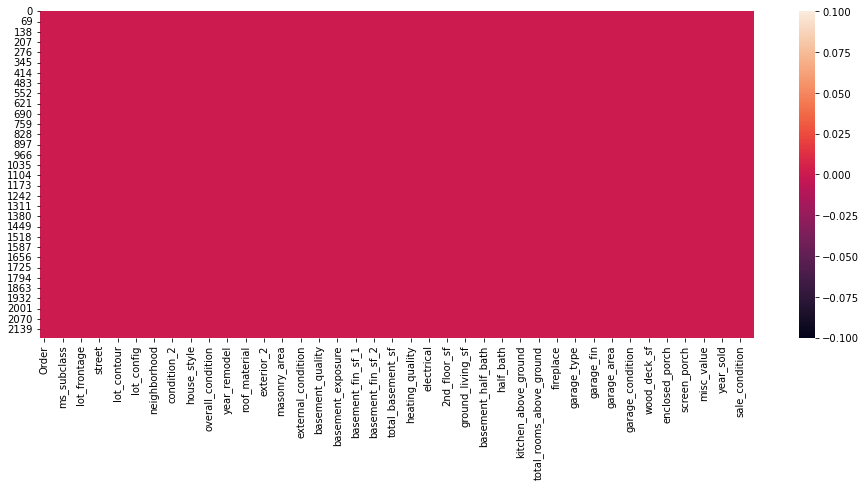

In [33]:
plt.figure(figsize=(16,6))

sns.heatmap(df.isnull());

In [34]:
df.shape

(2197, 78)

### Grouping of columns

#### ID Group

In [35]:
# create column groups to classify action
cols_to_drop = []

In [36]:
df['Order'].nunique()

2197

In [37]:
df['pid'].nunique()

2197

In [38]:
# Add these two columns to drop since they're mostly unique
cols_to_drop.extend(['Order','pid'])

#### Lot Group

In [39]:
lot_cols = df.columns[df.columns.str.contains('lot')]
df[lot_cols].head(5)

,lot_frontage,lot_area,lot_shape,lot_contour,lot_config,lot_slope
0,80.0,9605,Reg,Lvl,Corner,Gtl
1,90.0,14684,IR1,Lvl,CulDSac,Gtl
2,0.0,14375,IR1,Lvl,CulDSac,Gtl
3,48.0,6472,Reg,Lvl,Inside,Gtl
4,61.0,9734,IR1,Lvl,Inside,Gtl


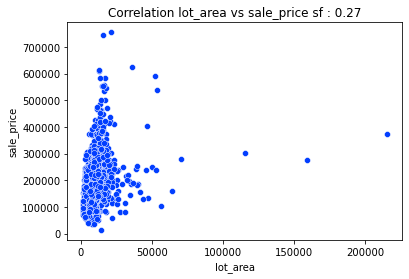

In [40]:
# check correlation of lot area and sale price

corr = df[['lot_area','sale_price']].corr()

sns.scatterplot(x='lot_area',y='sale_price',data=df)
plt.title(f"Correlation lot_area vs sale_price sf : {corr['lot_area'][1].round(2)}");

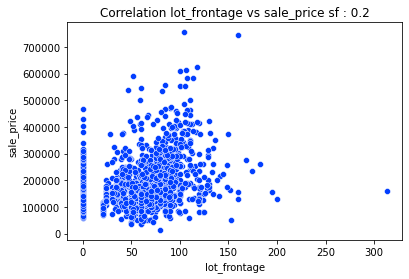

In [41]:
# check correlation of lot frontage and sale price

corr = df[['lot_frontage','sale_price']].corr()

sns.scatterplot(x='lot_frontage',y='sale_price',data=df)
plt.title(f"Correlation lot_frontage vs sale_price sf : {corr['lot_frontage'][1].round(2)}");

In [42]:
# This group can remain as is

#### SF Group (Square Footage)

In [43]:
sf_cols = df.columns[df.columns.str.contains('sf')]
df[sf_cols].head(5)

,basement_fin_sf_1,basement_fin_sf_2,basement_unf_sf,total_basement_sf,1st_floor_sf,2nd_floor_sf,low_quality_fin_sf,ground_living_sf,wood_deck_sf,open_porch_sf
0,0.0,0.0,1218.0,1218.0,1218,0,0,1218,0,178
1,485.0,177.0,1496.0,2158.0,2196,0,0,2196,84,70
2,111.0,354.0,354.0,819.0,1344,0,0,1344,0,118
3,0.0,0.0,1451.0,1451.0,1456,0,0,1456,192,42
4,241.0,113.0,30.0,384.0,744,630,0,1374,0,0


In [44]:
# check for redundant columns
pd.Series(df['ground_living_sf'] == \
          (df['1st_floor_sf']+df['2nd_floor_sf'])).mean(0)

# 0.98 majority of ground_living_sf is a summation of 1st_floor_sf and 2nd_floor_sf

0.9886208466090123

In [45]:
# check for redundant columns
df[df['ground_living_sf'] != \
          (df['1st_floor_sf']+df['2nd_floor_sf'])][['ground_living_sf','1st_floor_sf','2nd_floor_sf']]

# 0.98 majority of ground_living_sf is a summation of 1st_floor_sf and 2nd_floor_sf
# Let's investigate what to keep

,ground_living_sf,1st_floor_sf,2nd_floor_sf
67,2377,1313,0
126,1656,808,704
362,2168,928,928
373,1200,520,600
535,1223,520,623
613,1639,1166,0
669,2230,954,795
729,935,779,0
743,3086,1636,971
754,2320,1547,720


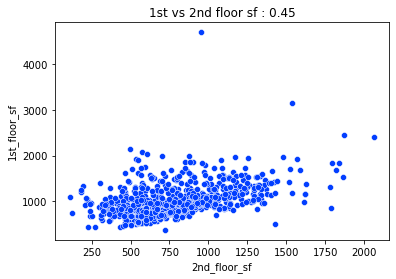

In [46]:
# check correlation of ground_living_sf and basement_total_sf

corr = df[df['2nd_floor_sf'] > 0][['2nd_floor_sf','1st_floor_sf']].corr()

sns.scatterplot(x='2nd_floor_sf',y='1st_floor_sf',data=df[df['2nd_floor_sf'] > 0])
plt.title(f"1st vs 2nd floor sf : {corr['2nd_floor_sf'][1].round(2)}");

# some correlation in 1st and 2nd floor

In [47]:
# Create has 2nd floor feature
df['has_2nd_floor_sf'] = df['2nd_floor_sf'].apply(lambda x : 0 if x == 0 else 1)

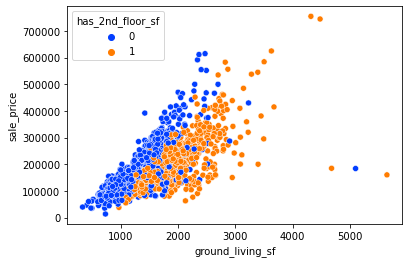

In [48]:
# plot scatter of sale_price and ground_living_area with hue `has_2nd_floor_sf`

sns.scatterplot(x='ground_living_sf',y='sale_price',data=df,hue='has_2nd_floor_sf');

__Intepretation:__
- Square footage of 2nd floor correlates with 1st floor, slightly (0.45)
- For houses with similar square footage : 2 floors will be cheaper than 1 floor

__Takeaway:__
- 2nd floor sf correlates quite significantly with 1st floor sf
- We can only keep has_2nd_floor_sf
- keep ground_living_sf because it's a summation of 1st_floor_sf and 2nd_floor_sf

In [49]:
cols_to_drop.extend(['1st_floor_sf','2nd_floor_sf'])

In [50]:
# mostly empty let's assign to cols_to_drop
df['low_quality_fin_sf'].value_counts().head(4)

0      2172
80        3
360       2
392       1
Name: low_quality_fin_sf, dtype: int64

In [51]:
cols_to_drop.extend(['low_quality_fin_sf'])

In [52]:
# check for redundant columns
pd.Series(df['total_basement_sf'] == \
          (df['basement_fin_sf_1']+df['basement_fin_sf_2']+df['basement_unf_sf'])).mean(0)

# 1.0 meaning the three columns are redundant

1.0

In [53]:
cols_to_drop.extend(['basement_fin_sf_1','basement_fin_sf_2','basement_unf_sf'])

In [54]:
# create total sf column from combining sf in basement and ground living area
df['total_sf'] = df['total_basement_sf'] + df['ground_living_sf']

In [55]:
df[['total_sf','total_basement_sf','ground_living_sf','sale_price']].corr()
# seems to correlate better with sale_price

,total_sf,total_basement_sf,ground_living_sf,sale_price
total_sf,1.000000,0.837586,0.872977,0.778508
total_basement_sf,0.837586,1.000000,0.464726,0.629605
ground_living_sf,0.872977,0.464726,1.000000,0.699675
sale_price,0.778508,0.629605,0.699675,1.000000


In [56]:
# add columns to drop
cols_to_drop.extend(['total_basement_sf','ground_living_sf'])

In [57]:
# Create a boolean column of has_basement feature

df['has_basement_sf'] = df['total_basement_sf'].apply(lambda x : 1 if x > 0 else 0)

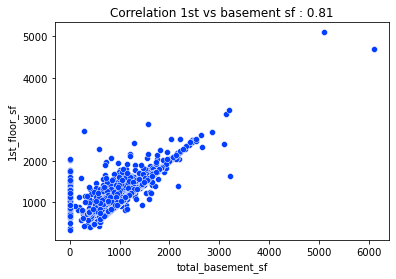

In [58]:
# check correlation of 1st_floor_sf and total_basement_sf

corr = df[['total_basement_sf','1st_floor_sf']].corr()

sns.scatterplot(x='total_basement_sf',y='1st_floor_sf',data=df)
plt.title(f"Correlation 1st vs basement sf : {corr['total_basement_sf'][1].round(2)}");

# Basement is usually the same size as 1st floor sf
# Keeping the two will create multi-collinearity, dropping is justified

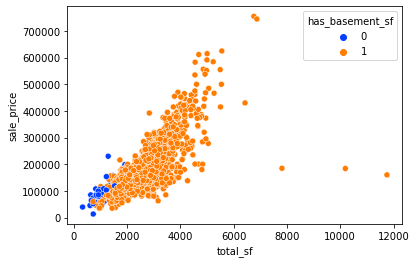

In [59]:
# plot scatter of sale_price and has_basement

sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='has_basement_sf');

__Intepretation:__
- Total basement sf correlates highly with 1st floor sf
- Houses with the same ground_living_sf sells better if they have basement
- But majority of the houses actually has basement anyway

__Takeaway:__
- Could drop this because most houses has basement
- And basement_sf correlates to ground sf anyway, therefore we can probably drop this column
- Leave only the version of 'has_basement'

#### Bathroom Group

In [60]:
lot_cols = df.columns[df.columns.str.contains('bath')]
df[lot_cols].head(5)

,basement_full_bath,basement_half_bath,full_bath,half_bath
0,0.0,0.0,1,1
1,0.0,0.0,2,0
2,0.0,1.0,1,0
3,0.0,0.0,2,0
4,0.0,0.0,2,1


In [61]:
df['basement_full_bath'].value_counts()

0.0    1294
1.0     873
2.0      28
3.0       2
Name: basement_full_bath, dtype: int64

In [62]:
df['basement_half_bath'].value_counts()

0.0    2061
1.0     133
2.0       3
Name: basement_half_bath, dtype: int64

In [63]:
df['full_bath'].value_counts()

2    1187
1     945
3      56
0       6
4       3
Name: full_bath, dtype: int64

In [64]:
df['half_bath'].value_counts()

0    1404
1     774
2      19
Name: half_bath, dtype: int64

In [65]:
# Create combined column
df['total_bath'] = df['full_bath'] + df['half_bath']*0.5 + df['basement_full_bath'] + df['basement_half_bath']*0.5

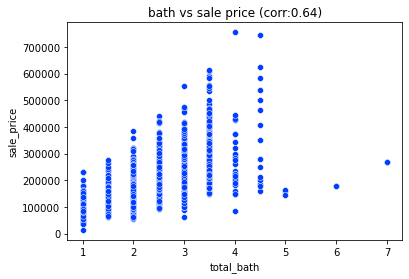

In [66]:
# Some correlation
corr = df[['total_bath','sale_price']].corr().round(2)

plt.title(f"bath vs sale price (corr:{corr['total_bath'][1]})")
sns.scatterplot(x='total_bath',y='sale_price',data=df);

In [67]:
# add redundant columns to drop
cols_to_drop.extend(['full_bath','half_bath','basement_full_bath','basement_half_bath'])

__Interpretation:__
- Combining all baths shows higher correlation with sale price

#### Above Ground Group

In [68]:
lot_cols = df.columns[df.columns.str.contains('above')]
df[lot_cols].head(5)

,bedroom_above_ground,kitchen_above_ground,total_rooms_above_ground
0,3,1,6
1,3,1,7
2,3,1,7
3,2,1,6
4,3,1,7


In [69]:
df[['bedroom_above_ground','sale_price']].corr()

,bedroom_above_ground,sale_price
bedroom_above_ground,1.000000,0.144923
sale_price,0.144923,1.000000


In [70]:
df[['total_rooms_above_ground','sale_price']].corr()

,total_rooms_above_ground,sale_price
total_rooms_above_ground,1.000000,0.486375
sale_price,0.486375,1.000000


In [71]:
df[['kitchen_above_ground','sale_price']].corr()

,kitchen_above_ground,sale_price
kitchen_above_ground,1.000000,-0.129349
sale_price,-0.129349,1.000000


In [72]:
# check for redundant columns
pd.Series(df['total_rooms_above_ground'] == \
          (df['kitchen_above_ground']+df['bedroom_above_ground'])).mean(0)

# They don't add up, let's keep all three for now

0.007282658170232135

#### Porch group

In [73]:
porch_cols = df.columns[df.columns.str.contains('porch')]
df[lot_cols].head(5)

,bedroom_above_ground,kitchen_above_ground,total_rooms_above_ground
0,3,1,6
1,3,1,7
2,3,1,7
3,2,1,6
4,3,1,7


In [74]:
porch_cols

Index(['open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch'], dtype='object')

In [75]:
pd.Series(df['open_porch_sf']>0).mean()

0.567592171142467

In [76]:
pd.Series(df['enclosed_porch']>0).mean()

0.15430131998179336

In [77]:
pd.Series(df['3ssn_porch']>0).mean()

0.012289485662266727

In [78]:
pd.Series(df['screen_porch']>0).mean()

0.08557123350022758

In [79]:
# Create a summation column
df['porch_sf'] = df['open_porch_sf']+df['enclosed_porch']+df['3ssn_porch']+df['screen_porch']

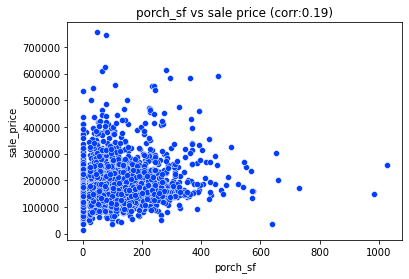

In [80]:
# Sale price doesn't really correlate well with porch sf
corr = df[['porch_sf','sale_price']].corr().round(2)

plt.title(f"porch_sf vs sale price (corr:{corr['porch_sf'][1]})")
sns.scatterplot(x='porch_sf',y='sale_price',data=df);

In [81]:
# Create a boolean column of has porch
df['has_porch'] = df['porch_sf'].apply(lambda x : 1 if x > 0 else 0)

In [82]:
df[['has_porch','sale_price']].corr()

,has_porch,sale_price
has_porch,1.000000,0.298882
sale_price,0.298882,1.000000


In [83]:
df['has_porch'].value_counts(normalize=True)

1    0.706418
0    0.293582
Name: has_porch, dtype: float64

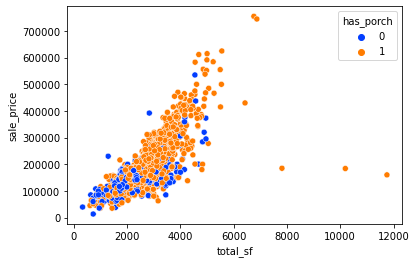

In [84]:
# plot scatter of sale_price and has_porch

sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='has_porch');

In [85]:
df['has_open_porch'] = df['open_porch_sf'].apply(lambda x : 1 if x > 0 else 0)

In [86]:
df[['has_open_porch','sale_price']].corr()

,has_open_porch,sale_price
has_open_porch,1.000000,0.435172
sale_price,0.435172,1.000000


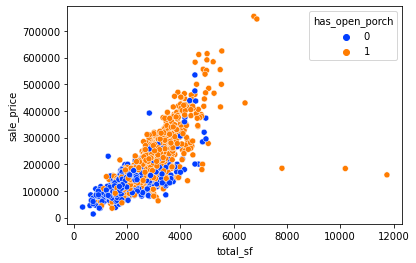

In [87]:
# plot scatter of sale_price and has_porch

sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='has_open_porch');

__Interpretation:__
- above 70% of houses `has_porch`
- But from the mix, we can see that it doesn't really influence the `sale_price`
- `has_open_porch` is actually the one that correlates most with the prices
- let's keep only `has_open_porch`

In [88]:
cols_to_drop.extend(['open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'porch_sf', 'has_porch'])

#### Year group

In [89]:
df['built-remodel'] = df['year_remodel']-df['year_built']

In [90]:
df['built-remodel'].value_counts(normalize=True)

0      0.535275
1      0.156122
30     0.010924
40     0.010469
25     0.009558
         ...   
105    0.000455
121    0.000455
66     0.000455
59     0.000455
122    0.000455
Name: built-remodel, Length: 115, dtype: float64

In [91]:
df[['year_built','year_remodel','year_sold','sale_price']].corr()['sale_price']

year_built      0.559975
year_remodel    0.531341
year_sold      -0.024833
sale_price      1.000000
Name: sale_price, dtype: float64

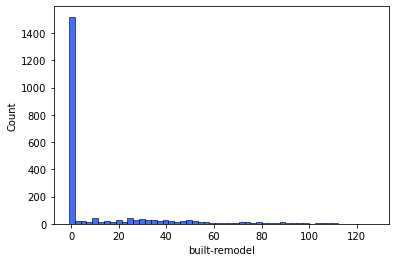

In [92]:
sns.histplot(x='built-remodel',data=df);

__Interpretation:__
- 50% of houses has no `year_remodel` i.e. same year as `year_built`
- It would be a duplicate of columns so we will only keep `year_built` as it has higher correlation
- keep `year_sold` for now since it doesn't correlate with other columns

In [93]:
cols_to_drop.extend(['year_remodel','built-remodel'])

#### Investigate fireplace

In [94]:
fireplace_cols = df.columns[df.columns.str.contains('fireplace')]
df[fireplace_cols].head(5)

,fireplace,fireplace_quality
0,0,None
1,1,TA
2,1,Gd
3,1,Gd
4,0,None


In [95]:
# create has fireplace 
df['has_fireplace'] = df['fireplace'].apply(lambda x:1 if x > 0 else 0)

In [96]:
df[['fireplace','has_fireplace','sale_price']].corr()

,fireplace,has_fireplace,sale_price
fireplace,1.000000,0.897820,0.485029
has_fireplace,0.897820,1.000000,0.487979
sale_price,0.485029,0.487979,1.000000


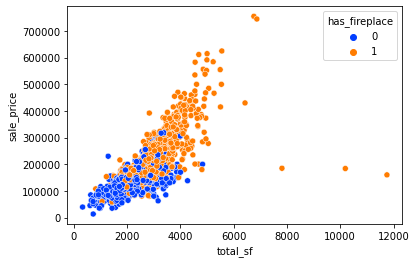

In [97]:
# plot scatter of sale_price and has_basement

sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='has_fireplace');

__Interpretation__
- Seem like houses with similar square footage will sell more expensively if they have fireplace
- And from correlation, we can see that the no. of fireplace doesn't really matter
- What matters is whether the house has fireplace or not

__Key Takeaway:__
- We can convert `fireplace` column to `has_fireplace`

In [98]:
cols_to_drop.extend(['fireplace'])

#### Garage Group

In [99]:
garage_cols = df.columns[df.columns.str.contains('garage')]
df[garage_cols].head(5)

,garage_type,garage_year_built,garage_fin,garage_cars,garage_area,garage_quality,garage_condition
0,Detchd,2007.0,RFn,2.0,576.0,TA,TA
1,Attchd,1990.0,RFn,3.0,701.0,TA,TA
2,Basment,1958.0,RFn,2.0,525.0,TA,TA
3,Attchd,2008.0,RFn,2.0,539.0,TA,TA
4,BuiltIn,2004.0,Fin,2.0,400.0,TA,TA


In [100]:
df[['garage_cars', 'garage_area','sale_price']].corr()

,garage_cars,garage_area,sale_price
garage_cars,1.000000,0.889199,0.643682
garage_area,0.889199,1.000000,0.637089
sale_price,0.643682,0.637089,1.000000


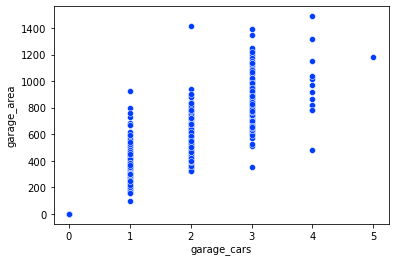

In [101]:
sns.scatterplot(x='garage_cars',y='garage_area',data=df);

__Interpretation:__
- Garage cars actually correlates to garage area
- We can only keep one of them
- Since `garage_cars` is sligthly more correlated with `sale_price` we will keep `garage_cars`

In [102]:
cols_to_drop.extend(['garage_area'])

In [103]:
# How many garages are built on the same year as house
(df['garage_year_built'] == df['year_built']).mean()

0.7660446062812927

In [104]:
# We can actually drop this
cols_to_drop.extend(['garage_year_built'])

#### Wood Deck

In [105]:
wood_cols = df.columns[df.columns.str.contains('wood')]
df[wood_cols].head(5)

,wood_deck_sf
0,0
1,84
2,0
3,192
4,0


In [106]:
# Create boolean feature column
df['has_wood_deck'] = df['wood_deck_sf'].apply(lambda x : 1 if x > 0 else 0)

In [107]:
df[['wood_deck_sf','has_wood_deck','sale_price']].corr()

,wood_deck_sf,has_wood_deck,sale_price
wood_deck_sf,1.000000,0.790066,0.343644
has_wood_deck,0.790066,1.000000,0.324547
sale_price,0.343644,0.324547,1.000000


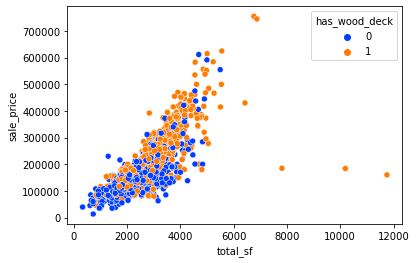

In [108]:
# plot scatter of sale_price and has_basement

sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='has_wood_deck');

__Interpretation__
- Seem like houses with similar square footage will sell more expensively if they have wood deck
- Although it's not as clear as other features e.g. fireplace
- We can see that `has_wood_deck` houses has higher `sale_price` in general
- `has_wood_deck` also correlates better with sale price

__Key Takeaway:__
- keep `has_wood_deck` drop `wood_deck_sf`

In [109]:
cols_to_drop.extend(['wood_deck_sf'])

#### Pool

In [110]:
df['pool_area'].value_counts()

0      2185
738       1
576       1
555       1
480       1
512       1
648       1
368       1
519       1
144       1
800       1
561       1
228       1
Name: pool_area, dtype: int64

In [111]:
cols_to_drop.extend(['pool_area'])

#### Misc

In [112]:
df['misc_value'].value_counts().head(5)

0       2119
400       12
500       11
450        6
2000       6
Name: misc_value, dtype: int64

In [113]:
cols_to_drop.extend(['misc_value'])

#### MS subclass

In [114]:
cols_to_drop.extend(['ms_subclass'])

#### Converting year and month to string

In [115]:
# Convert year_built to string
df['year_built'] = df['year_built'].apply(lambda x : str(x))

In [116]:
# Convert month_sold to string
df['month_sold'] = df['month_sold'].apply(lambda x : str(x))

#### Execute column grouping

In [117]:
# create column groups to classify action
print(cols_to_drop)

['Order', 'pid', '1st_floor_sf', '2nd_floor_sf', 'low_quality_fin_sf', 'basement_fin_sf_1', 'basement_fin_sf_2', 'basement_unf_sf', 'total_basement_sf', 'ground_living_sf', 'full_bath', 'half_bath', 'basement_full_bath', 'basement_half_bath', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'porch_sf', 'has_porch', 'year_remodel', 'built-remodel', 'fireplace', 'garage_area', 'garage_year_built', 'wood_deck_sf', 'pool_area', 'misc_value', 'ms_subclass']


In [118]:
for col in cols_to_drop:
    df.drop(columns=[col],inplace=True)

### Check resulting numerical columns

In [119]:
df.select_dtypes(exclude=object).head(5)

,lot_frontage,lot_area,overall_quality,overall_condition,masonry_area,bedroom_above_ground,kitchen_above_ground,total_rooms_above_ground,garage_cars,year_sold,sale_price,has_2nd_floor_sf,total_sf,has_basement_sf,total_bath,has_open_porch,has_fireplace,has_wood_deck
0,80.0,9605,7,6,0.0,3,1,6,2.0,2009,159000,0,2436.0,1,1.5,1,0,0
1,90.0,14684,7,7,234.0,3,1,7,3.0,2009,271900,0,4354.0,1,2.0,1,1,1
2,0.0,14375,6,6,541.0,3,1,7,2.0,2009,137500,0,2163.0,1,1.5,1,1,0
3,48.0,6472,9,5,500.0,2,1,6,2.0,2009,248500,0,2907.0,1,2.0,1,1,1
4,61.0,9734,7,5,0.0,3,1,7,2.0,2009,167000,1,1758.0,1,2.5,0,0,0


In [120]:
# check remaining columns
df.select_dtypes(exclude=object).columns

Index(['lot_frontage', 'lot_area', 'overall_quality', 'overall_condition',
       'masonry_area', 'bedroom_above_ground', 'kitchen_above_ground',
       'total_rooms_above_ground', 'garage_cars', 'year_sold', 'sale_price',
       'has_2nd_floor_sf', 'total_sf', 'has_basement_sf', 'total_bath',
       'has_open_porch', 'has_fireplace', 'has_wood_deck'],
      dtype='object')

## Clean Categorical Columns

MS Zoning

In [121]:
df['ms_zoning'].value_counts(normalize=True)

RL         0.775603
RM         0.154756
FV         0.051434
C (all)    0.008648
RH         0.007738
I (all)    0.000910
A (agr)    0.000910
Name: ms_zoning, dtype: float64

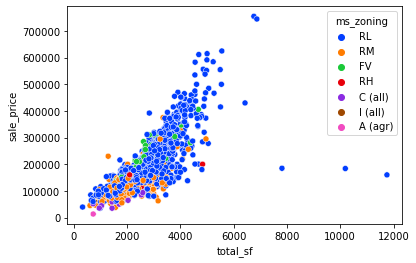

In [122]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='ms_zoning');

# We can group ms_zoning to Residential vs Non

Street

In [123]:
df['street'].value_counts(dropna=False,normalize=True)

Pave    0.995904
Grvl    0.004096
Name: street, dtype: float64

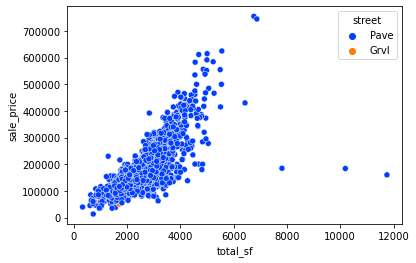

In [124]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='street');

# Majority is Pave we can convert to boolean column

Lot Shape

In [125]:
df['lot_shape'].value_counts(dropna=False,normalize=True)

Reg    0.632226
IR1    0.335457
IR2    0.027310
IR3    0.005007
Name: lot_shape, dtype: float64

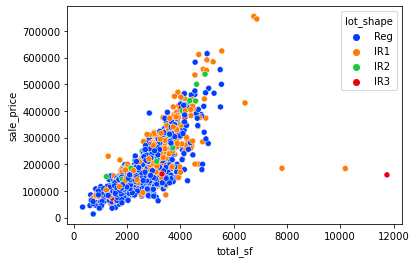

In [126]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='lot_shape');

# group lot_shape to boolean - Reg = 1, Else = 0

Lot Contour

In [127]:
# Lot contour
df['lot_contour'].value_counts(dropna=False,normalize=True)

Lvl    0.902594
HLS    0.039144
Bnk    0.038234
Low    0.020027
Name: lot_contour, dtype: float64

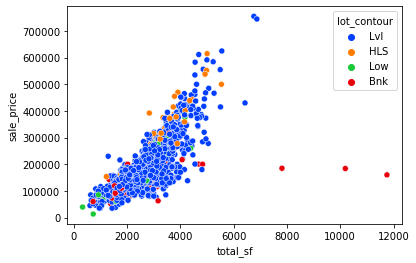

In [128]:
# Check scatterplot
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='lot_contour');

# Group lot_contour to Level = 1 , Else = 0

Lot Slope

In [129]:
df['lot_slope'].value_counts(dropna=False,normalize=True)

# Majority is Gtl

Gtl    0.951752
Mod    0.042330
Sev    0.005917
Name: lot_slope, dtype: float64

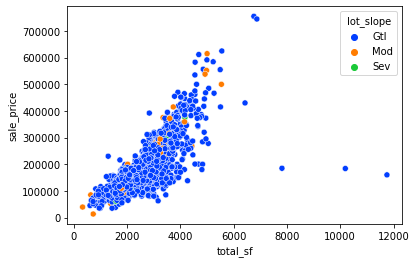

In [130]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='lot_slope');

# Convert to boolean - Gtl = 1, Else = 0

Building Type

In [131]:
df['building_type'].value_counts(dropna=False,normalize=True)

# Some duplicates of category should be grouped

1Fam      0.826127
TwnhsE    0.081020
Duplex    0.040965
Twnhs     0.030496
2fmCon    0.021393
Name: building_type, dtype: float64

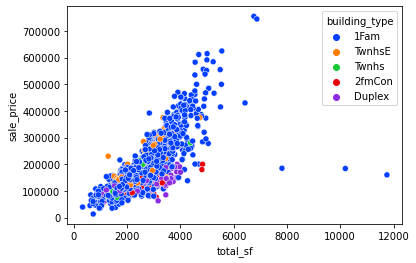

In [132]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='building_type');

# Group Townhouse - T, Duplex - D, 1 Fam - 1F, 2 Fam - 2F

House Style

In [133]:
df['house_style'].value_counts(dropna=False,normalize=True)

1Story    0.511152
2Story    0.299954
1.5Fin    0.099681
SLvl      0.044151
SFoyer    0.029131
2.5Unf    0.007738
1.5Unf    0.006372
2.5Fin    0.001821
Name: house_style, dtype: float64

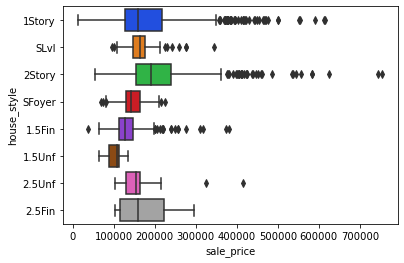

In [134]:
sns.boxplot(x='sale_price',y='house_style',data=df,orient='h');

# Group to 1, 2, S

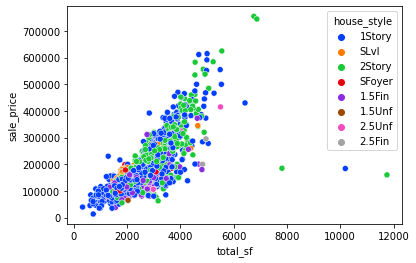

In [135]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='house_style');

Heating Quality

In [136]:
df['heating_quality'].value_counts(dropna=False,normalize=True)

Ex    0.512517
TA    0.287665
Gd    0.166136
Fa    0.032317
Po    0.001365
Name: heating_quality, dtype: float64

Central Air

In [137]:
df['central_air'].value_counts(dropna=False,normalize=True)

Y    0.93218
N    0.06782
Name: central_air, dtype: float64

Kitchen Quality

In [138]:
df['kitchen_quality'].value_counts(dropna=False,normalize=True)

TA    0.502959
Gd    0.395995
Ex    0.074647
Fa    0.025944
Po    0.000455
Name: kitchen_quality, dtype: float64

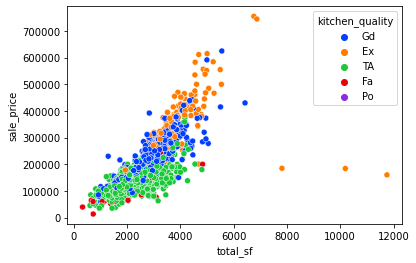

In [139]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='kitchen_quality');

# Group up Fa and Po - to clean up

Garage Fin

In [140]:
df['garage_fin'].value_counts(dropna=False,normalize=True)

Unf    0.410560
RFn    0.286299
Fin    0.247610
NA     0.055530
Name: garage_fin, dtype: float64

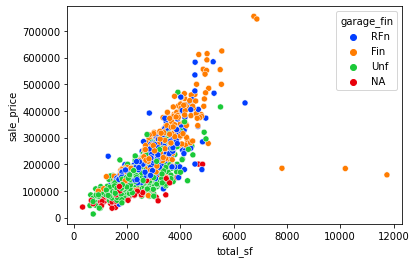

In [141]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='garage_fin');

# Combine NA and Unf to a single group

Condition 1

In [142]:
df['condition_1'].value_counts()

Norm      1894
Feedr      122
Artery      66
RRAn        39
PosN        32
RRAe        18
PosA        14
RRNe         6
RRNn         6
Name: condition_1, dtype: int64

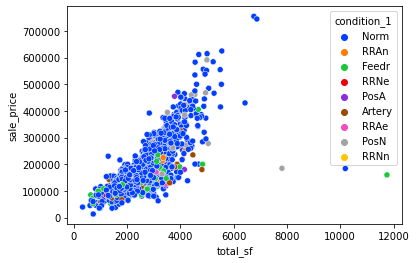

In [143]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='condition_1');

# Group up condition_1 to Normal - N, Feeder - F, Artery - A, Railroad - R 

Sale Type

In [144]:
df['sale_type'].value_counts()

WD       1898
New       185
COD        63
ConLD      21
CWD         9
ConLw       6
ConLI       6
Oth         5
Con         3
VWD         1
Name: sale_type, dtype: int64

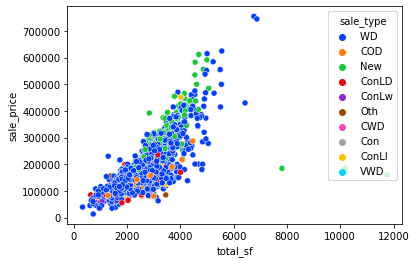

In [145]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='sale_type');

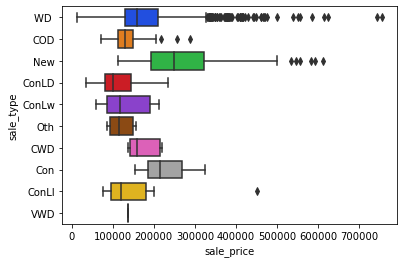

In [146]:
sns.boxplot(x='sale_price',y='sale_type',data=df,orient='h');

Sale Condition

In [147]:
df['sale_condition'].value_counts()

Normal     1809
Partial     190
Abnorml     135
Family       35
Alloca       18
AdjLand      10
Name: sale_condition, dtype: int64

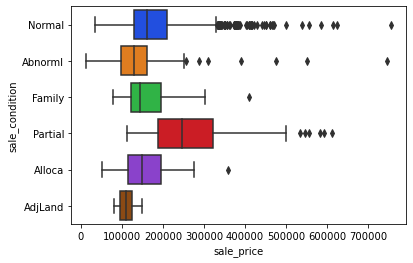

In [148]:
sns.boxplot(x='sale_price',y='sale_condition',data=df,orient='h');

Roof Style

In [149]:
df['roof_style'].value_counts()

Gable      1735
Hip         416
Gambrel      19
Flat         16
Mansard       8
Shed          3
Name: roof_style, dtype: int64

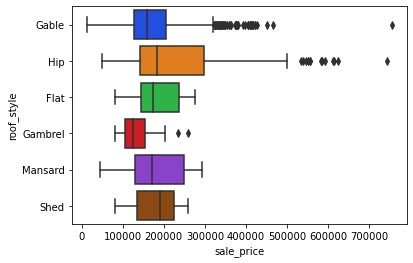

In [150]:
sns.boxplot(x='sale_price',y='roof_style',data=df,orient='h');

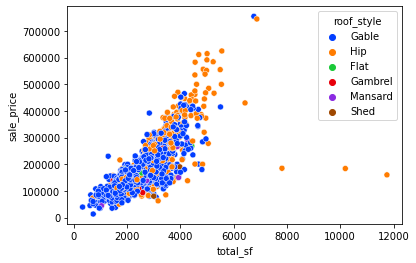

In [151]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='roof_style');

Masonry Type

In [152]:
df['masonry_type'].value_counts()

None       1329
BrkFace     658
Stone       190
BrkCmn       19
CBlock        1
Name: masonry_type, dtype: int64

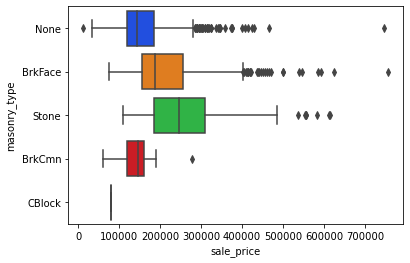

In [153]:
sns.boxplot(x='sale_price',y='masonry_type',data=df,orient='h');

Functional

In [154]:
df['functional'].value_counts()

Typ     2037
Min2      58
Min1      49
Mod       27
Maj1      17
Maj2       7
Sal        1
Sev        1
Name: functional, dtype: int64

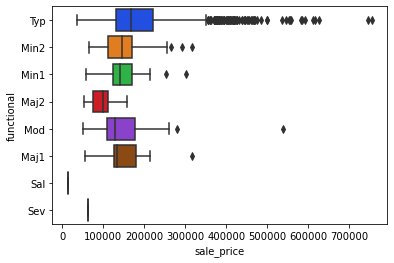

In [155]:
sns.boxplot(x='sale_price',y='functional',data=df,orient='h');

Garage Type

In [156]:
df['garage_type'].value_counts()

Attchd     1318
Detchd      568
BuiltIn     137
NA          120
Basment      28
2Types       17
CarPort       9
Name: garage_type, dtype: int64

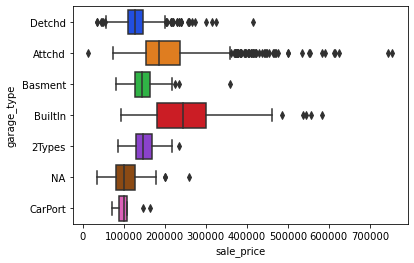

In [157]:
sns.boxplot(x='sale_price',y='garage_type',data=df,orient='h');

Garage Quality

In [158]:
df['garage_quality'].value_counts()

TA    1957
NA     122
Fa      93
Gd      18
Po       5
Ex       2
Name: garage_quality, dtype: int64

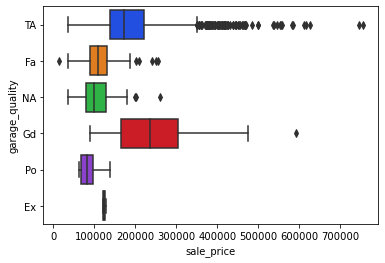

In [159]:
sns.boxplot(x='sale_price',y='garage_quality',data=df,orient='h');

Basement Quality

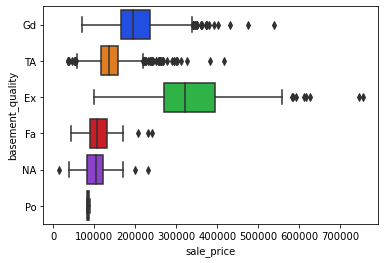

In [160]:
sns.boxplot(x='sale_price',y='basement_quality',data=df);

In [161]:
df.select_dtypes(include=object).columns

Index(['ms_zoning', 'street', 'lot_shape', 'lot_contour', 'utilities',
       'lot_config', 'lot_slope', 'neighborhood', 'condition_1', 'condition_2',
       'building_type', 'house_style', 'year_built', 'roof_style',
       'roof_material', 'exterior_1', 'exterior_2', 'masonry_type',
       'external_quality', 'external_condition', 'foundation',
       'basement_quality', 'basement_condition', 'basement_exposure',
       'basement_fin_type_1', 'basement_fin_type_2', 'heating',
       'heating_quality', 'central_air', 'electrical', 'kitchen_quality',
       'functional', 'fireplace_quality', 'garage_type', 'garage_fin',
       'garage_quality', 'garage_condition', 'paved_drive', 'month_sold',
       'sale_type', 'sale_condition'],
      dtype='object')

## Execution of categorical grouping

Grouping Dictionaries

In [162]:
def map_building_type(string):
    build_dict = {'1Fam':'1F','2fmCon':'2F','Duplex':'D','TwnhsE':'T','Twnhs':'T'}
    return build_dict[string]

In [163]:
def map_house_style(string):
    house_dict = {'1Story':'1','1.5Fin':'1','1.5Unf':'1','2.5Fin':'2','2.5Unf':'2','2Story':'2',\
                  'SLvl':'S','SFoyer':'S'}
    return house_dict[string]

In [164]:
def garage_type_map(string):
    garage_dict = {'Detchd':'D','Attchd':'A','BuiltIn':'B','Basment':'O','2Types':'O','NA':'O','CarPort':'O'}
    return garage_dict[string]

In [165]:
def garage_q_map(string):
    garage_q_dict = {'TA':'A','Gd':'G','Fa':'O','NA':'O','Po':'O','Ex':'O'}
    return garage_q_dict[string]

In [166]:
def map_condition_1(string):
    condition_dict = {'Norm':'N','Feedr':'F','Artery':'A','RRAn':'R','RRNe':'R','RRAe':'R',\
                      'RRNn':'R','PosA':'P','PosN':'P'}
    return condition_dict[string]

In [167]:
def sale_type_map(string):
    condition_dict = {'WD ':'W','VWD':'W','CWD':'W','New':'N','COD':'COD','ConLD':'CON','ConLw':'CON',
                     'Con':'CON','ConLI':'CON','Oth':'CON'}
    return condition_dict[string]

In [168]:
def sale_cond_map(string):
    condition_dict = {'Normal':'N','Partial':'P','Abnorml':'Other','Family':'Other','Alloca':'Other'
                      ,'AdjLand':'Other'}
    return condition_dict[string]

In [169]:
def mason_type_map(string):
    mason_dict = {'None':'N','BrkFace':'B','BrkCmn':'B','CBlock':'B','Stone':'S'}
    return mason_dict[string]

In [170]:
def roof_style_map(string):
    roof_dict = {'Gable':'G','Hip':'H','Flat':'O','Gambrel':'O','Shed':'O','Mansard':'O'}
    return roof_dict[string]

In [171]:
def basement_quality_map(string):
    base_dict = {'TA':'A','Gd':'G','Fa':'O','NA':'O','Po':'O','Ex':'E'}
    return base_dict[string]

Grouping Execution

In [172]:
# Group residential and none
df['ms_zoning'] = df['ms_zoning'].apply(lambda x : 'Res' if x in ['RL','RM','FV','RH','RP'] else 'Non')

In [173]:
# Convert street to boolean
df['street'] = df['street'].apply(lambda x : 1 if x == 'Pave' else 0)

In [174]:
# Convert lotshape to boolean - Reg = 1 , Else = 0
df['lot_shape'] = df['lot_shape'].apply(lambda x : 1 if x == 'Reg' else 0)

In [175]:
# Convert lot_contour to boolean - Level = 1 , Else = 0
df['lot_contour'] = df['lot_contour'].apply(lambda x : 1 if x == 'Lvl' else 0)

In [176]:
# Convert lot_slope to boolean - Gtl =1 , Else = 0
df['lot_slope'] = df['lot_slope'].apply(lambda x : 1 if x == 'Gtl' else 0)

In [177]:
# Group up heating quality
df['heating_quality'] = df['heating_quality'].apply(lambda x : 'Fa' if x == 'Po' else x)

In [178]:
# Convert central air to boolean - Y = 1 (has central air)
df['central_air'] = df['central_air'].apply(lambda x : 1 if x == 'Y' else 0)

In [179]:
# Combine Unf and Na
df['garage_fin'] = df['garage_fin'].apply(lambda x : 'Unf' if (x=='NA') else x)

In [180]:
# Group up condition 1 from dictionary mapping
df['condition_1'] = df['condition_1'].apply(map_condition_1)

In [181]:
# Group up sale tyupe from dictionary mapping
df['sale_type'] = df['sale_type'].apply(sale_type_map)

In [182]:
# Group up garage type from dictionary mapping
df['garage_type'] = df['garage_type'].apply(garage_type_map)

In [183]:
# Group up garage quality from dictionary mapping
df['garage_quality'] = df['garage_quality'].apply(garage_q_map)

In [184]:
# Group up building type from dictionary mapping
df['building_type'] = df['building_type'].apply(map_building_type)

In [185]:
# Group up house style from dictionary mapping
df['house_style'] = df['house_style'].apply(map_house_style)

In [186]:
# Group up kitchen quality to Ta except Good and Excellent
df['kitchen_quality'] = df['kitchen_quality'].apply(lambda x : x if (x=='Gd') or (x=='Ex') else 'Ta')

In [187]:
# Convert functional to boolean
df['functional'] = df['functional'].apply(lambda x : 1 if x == 'Typ' else 0)

In [188]:
# Group up sale condition from dictionary mapping
df['sale_condition'] = df['sale_condition'].apply(sale_cond_map)

In [189]:
# Group up roofstyle from dictionary mapping
df['roof_style'] = df['roof_style'].apply(roof_style_map)

In [190]:
# Group up masonry from dictionary mapping
df['masonry_type'] = df['masonry_type'].apply(mason_type_map)

In [191]:
# Group up masonry from dictionary mapping
df['basement_quality'] = df['basement_quality'].apply(basement_quality_map)

Check outcome

In [192]:
df.select_dtypes(include=object).columns

Index(['ms_zoning', 'utilities', 'lot_config', 'neighborhood', 'condition_1',
       'condition_2', 'building_type', 'house_style', 'year_built',
       'roof_style', 'roof_material', 'exterior_1', 'exterior_2',
       'masonry_type', 'external_quality', 'external_condition', 'foundation',
       'basement_quality', 'basement_condition', 'basement_exposure',
       'basement_fin_type_1', 'basement_fin_type_2', 'heating',
       'heating_quality', 'electrical', 'kitchen_quality', 'fireplace_quality',
       'garage_type', 'garage_fin', 'garage_quality', 'garage_condition',
       'paved_drive', 'month_sold', 'sale_type', 'sale_condition'],
      dtype='object')

## Feature Engineering

In [193]:
# Create log_sale_price column
df['log_sale_price'] = df['sale_price'].apply(np.log)

In [194]:
# Log lot area correlates better with sale price
df['log_lot_area'] = df['lot_area'].apply(np.log)

In [195]:
df.corr()['log_sale_price'].sort_values(ascending=False)

log_sale_price              1.000000
sale_price                  0.945548
overall_quality             0.831278
total_sf                    0.770939
garage_cars                 0.679208
total_bath                  0.668361
has_fireplace               0.519794
total_rooms_above_ground    0.481543
has_open_porch              0.472291
masonry_area                0.445062
central_air                 0.386806
log_lot_area                0.368253
has_wood_deck               0.342895
lot_area                    0.255141
has_basement_sf             0.228499
bedroom_above_ground        0.180497
lot_frontage                0.167402
functional                  0.158611
street                      0.097370
has_2nd_floor_sf            0.097298
year_sold                  -0.022093
lot_contour                -0.026321
lot_slope                  -0.040323
overall_condition          -0.052567
kitchen_above_ground       -0.138279
lot_shape                  -0.325192
Name: log_sale_price, dtype: float64

In [196]:
# Interaction columns
df['overall_sf'] = df['overall_quality'] * df['total_sf']

### Clean Outliers

Loot Frontage

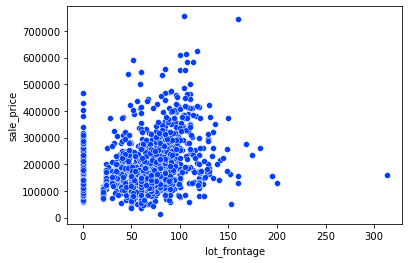

In [197]:
sns.scatterplot(x='lot_frontage',y='sale_price',data=df);

In [198]:
df[['lot_frontage']].sort_values('lot_frontage',ascending=False).head(3)

,lot_frontage
672,313.0
1882,200.0
1814,195.0


In [199]:
# Consider removing lot frontage outlier
df = df[df['lot_frontage']<195]

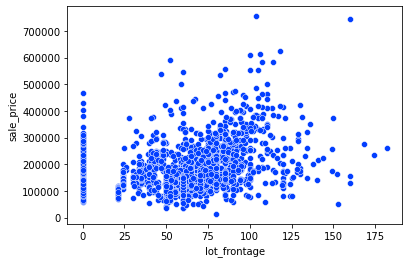

In [200]:
sns.scatterplot(x='lot_frontage',y='sale_price',data=df);

Lot Area

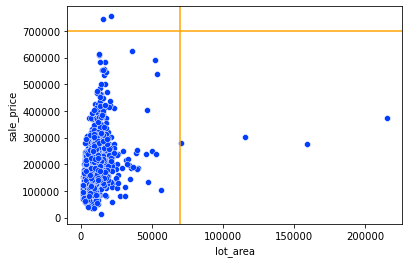

In [201]:
sns.scatterplot(x='lot_area',y='sale_price',data=df)
plt.axvline(x=70000,color='orange')
plt.axhline(y=700000,color='orange');

In [202]:
# Consider removing lot area outlier
df = df[df['lot_area'] < 70000]

In [203]:
# Remove sale price outlier
df = df[df['sale_price']<700000]

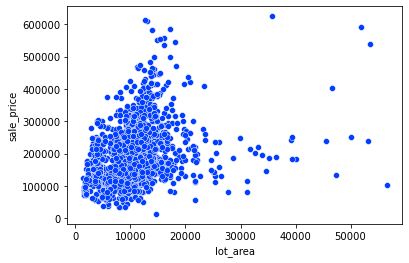

In [204]:
sns.scatterplot(x='lot_area',y='sale_price',data=df);

Log Lot Area

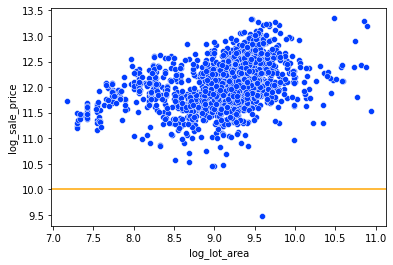

In [205]:
sns.scatterplot(x='log_lot_area',y='log_sale_price',data=df)
plt.axhline(y=10,color='orange');

In [206]:
df = df[df['log_sale_price'] > 10]

In [207]:
df[['log_lot_area','log_sale_price']].corr()

,log_lot_area,log_sale_price
log_lot_area,1.000000,0.372464
log_sale_price,0.372464,1.000000


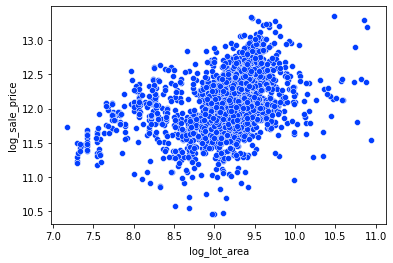

In [208]:
sns.scatterplot(x='log_lot_area',y='log_sale_price',data=df);

Total Square Footage

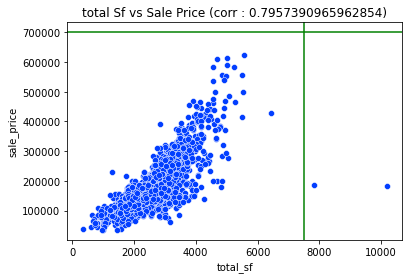

In [209]:
# plot scatter of sale_price and has_basement
plt.axvline(x=7500,color='green')
plt.axhline(y=700000,color='green')
cor = df[['total_sf','sale_price']].corr()
plt.title(f"total Sf vs Sale Price (corr : {cor['sale_price'][0]})")
sns.scatterplot(x='total_sf',y='sale_price',data=df);

In [210]:
df[['lot_area']].sort_values('lot_area',ascending=False).head(5)

,lot_area
332,56600
2141,53504
1590,53107
366,51974
215,50102


In [211]:
df[(df['total_sf']<3000) & (df['sale_price']>350000)]

,ms_zoning,lot_frontage,lot_area,street,lot_shape,lot_contour,utilities,lot_config,lot_slope,neighborhood,...,has_2nd_floor_sf,total_sf,has_basement_sf,total_bath,has_open_porch,has_fireplace,has_wood_deck,log_sale_price,log_lot_area,overall_sf
2135,Res,60.0,8089,1,1,0,AllPub,Inside,1,StoneBr,...,0,2838.0,1,3.0,0,1,1,12.879017,8.99826,22704.0


In [212]:
# remove total_sf outlier
df = df[df['total_sf'] < 7500]

In [213]:
# remove outlier from small area but high price
df.drop(index=list(df[(df['total_sf']<2000) & (df['sale_price']>200000)].index),inplace=True)

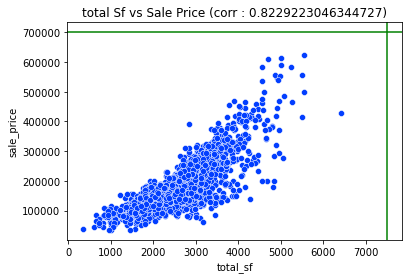

In [214]:
# plot scatter of sale_price and has_basement
plt.axvline(x=7500,color='green')
plt.axhline(y=700000,color='green')
cor = df[['total_sf','sale_price']].corr()
plt.title(f"total Sf vs Sale Price (corr : {cor['sale_price'][0]})")
sns.scatterplot(x='total_sf',y='sale_price',data=df);

Garage Cars

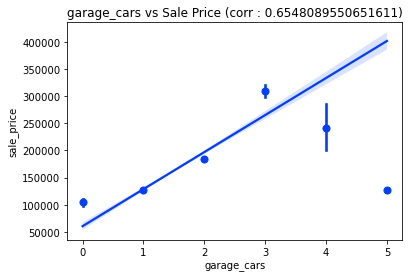

In [215]:
# plot scatter of sale_price and has_basement

cor = df[['garage_cars','sale_price']].corr()
plt.title(f"garage_cars vs Sale Price (corr : {cor['sale_price'][0]})")
sns.regplot(x='garage_cars',y='sale_price',data=df,x_estimator=np.mean);

In [216]:
# Remove outlier from garage cars
df = df[df['garage_cars']<4]

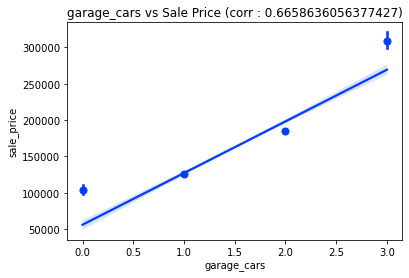

In [217]:
# plot scatter of sale_price and has_basement

cor = df[['garage_cars','sale_price']].corr()
plt.title(f"garage_cars vs Sale Price (corr : {cor['sale_price'][0]})")
sns.regplot(x='garage_cars',y='sale_price',data=df,x_estimator=np.mean);

Total Square footage vs log sale price

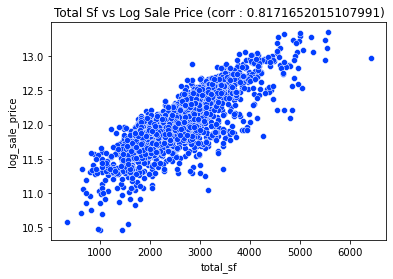

In [218]:
# plot scatter of sale_price and has_basement
cor = df[['total_sf','log_sale_price']].corr()
plt.title(f"Total Sf vs Log Sale Price (corr : {cor['log_sale_price'][0]})")
sns.scatterplot(x='total_sf',y='log_sale_price',data=df);

In [219]:
df = df[df['total_sf'] < 6000]
df = df[df['total_sf'] > 1000]

In [220]:
df = df[df['log_sale_price'] > 10.6]

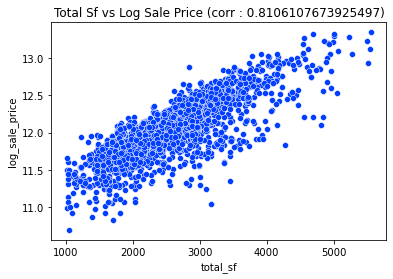

In [221]:
# plot scatter of sale_price and has_basement
cor = df[['total_sf','log_sale_price']].corr()
plt.title(f"Total Sf vs Log Sale Price (corr : {cor['log_sale_price'][0]})")
sns.scatterplot(x='total_sf',y='log_sale_price',data=df);

Oveall Quality

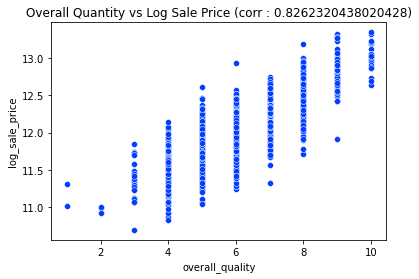

In [222]:
# plot scatter of sale_price and has_basement
cor = df[['overall_quality','log_sale_price']].corr()
plt.title(f"Overall Quantity vs Log Sale Price (corr : {cor['log_sale_price'][0]})")
sns.scatterplot(x='overall_quality',y='log_sale_price',data=df);

In [223]:
# remove overall quality 1 outliers
df = df[df['overall_quality'] > 1]

In [260]:
df[df['overall_quality'] > 2][['overall_quality','log_sale_price']].corr()

,overall_quality,log_sale_price
overall_quality,1.000000,0.825353
log_sale_price,0.825353,1.000000


In [264]:
# drop outlier in overall quality and log sale price
df.drop(index=list(df[(df['overall_quality']==9) & (df['log_sale_price']<12)].index),inplace=True)

In [266]:
# drop outlier in overall quality and log sale price
df.drop(index=list(df[(df['overall_quality']==6) & (df['log_sale_price']>12.5)].index),inplace=True)

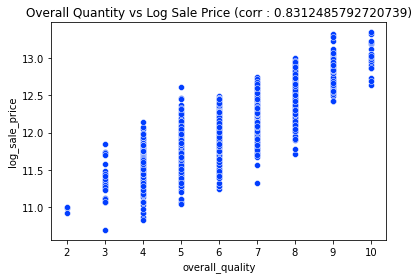

In [267]:
# plot scatter of sale_price and has_basement
cor = df[['overall_quality','log_sale_price']].corr()
plt.title(f"Overall Quantity vs Log Sale Price (corr : {cor['log_sale_price'][0]})")
sns.scatterplot(x='overall_quality',y='log_sale_price',data=df);

Total Rooms Above Ground

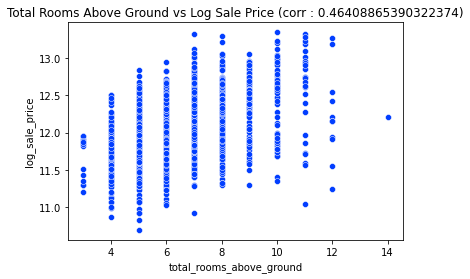

In [225]:
# plot scatter of sale_price and has_basement
cor = df[['total_rooms_above_ground','log_sale_price']].corr()
plt.title(f"Total Rooms Above Ground vs Log Sale Price (corr : {cor['log_sale_price'][0]})")
sns.scatterplot(x='total_rooms_above_ground',y='log_sale_price',data=df);

In [226]:
# remove total room outlier
df = df[df['total_rooms_above_ground']<12]

In [226]:
# remove total room outlier
df = df[df['total_rooms_above_ground']<12]

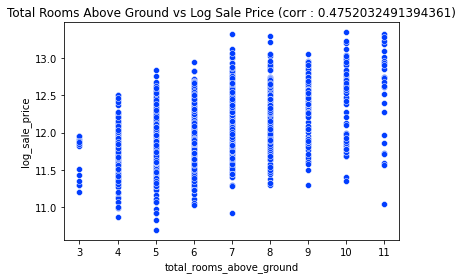

In [227]:
# plot scatter of sale_price and has_basement
cor = df[['total_rooms_above_ground','log_sale_price']].corr()
plt.title(f"Total Rooms Above Ground vs Log Sale Price (corr : {cor['log_sale_price'][0]})")
sns.scatterplot(x='total_rooms_above_ground',y='log_sale_price',data=df);

Total Bath

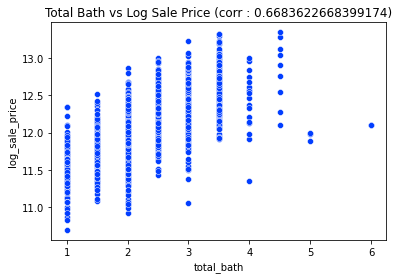

In [228]:
# plot scatter of sale_price and has_basement
cor = df[['total_bath','log_sale_price']].corr()
plt.title(f"Total Bath vs Log Sale Price (corr : {cor['log_sale_price'][0]})")
sns.scatterplot(x='total_bath',y='log_sale_price',data=df);

In [229]:
# remove all bath outliers
df = df[df['total_bath']<5]

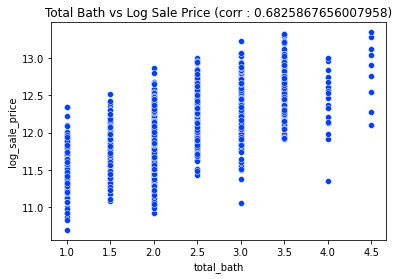

In [230]:
# plot scatter of sale_price and has_basement
cor = df[['total_bath','log_sale_price']].corr()
plt.title(f"Total Bath vs Log Sale Price (corr : {cor['log_sale_price'][0]})")
sns.scatterplot(x='total_bath',y='log_sale_price',data=df);

#### Remove lot_area

In [231]:
# Drop lot_area
df.drop(columns=['lot_area'],inplace=True)

# Run model to check numerical model

#### Create function to run linear regression

In [232]:
def linreg_log(X,y,t_s=0.2,log=False):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=t_s,random_state=42)
    lr = LinearRegression()
    
    if log == True:
        y_train_log = np.log(y_train)
        y_test_log = np.log(y_test)
        
        lr.fit(X_train,y_train_log)
        
        y_train_pred_log = lr.predict(X_train)
        y_test_pred_log = lr.predict(X_test)

        y_train_preds = np.exp(y_train_pred_log)
        y_test_preds = np.exp(y_test_pred_log)
        
        print(" Linear Log Model ".center(30, "="))
        
        # train test score
        train_r2 = lr.score(X_train,y_train_log)
        test_r2 = lr.score(X_test,y_test_log)

        # cross validation score
        mean_cross_val = cross_val_score(lr, X_train, y_train_log)
        
    else:
        
        lr.fit(X_train,y_train)
        y_train_preds = lr.predict(X_train)
        y_test_preds = lr.predict(X_test)
        print(" Linear Model ".center(30, "="))
        
        # train test score
        train_r2 = lr.score(X_train,y_train)
        test_r2 = lr.score(X_test,y_test)

        # cross validation score
        mean_cross_val = cross_val_score(lr, X_train, y_train)

    # metrics (comparing y_preds with y)
    rmse_train = round(metrics.mean_squared_error(y_train,y_train_preds,squared=False),2)
    rmse_test = round(metrics.mean_squared_error(y_test,y_test_preds,squared=False),2)

    
    print(f"train r2: {train_r2}")
    print(f"test_r2: {test_r2}")
    print(f"mean cross val: {mean_cross_val.round(4)}")
    print(f"train rmse: {rmse_train}")
    print(f"test rmse: {rmse_test}")
    
    return y_test,y_test_preds

Selecting Columns

In [233]:
# Numerical Columns to choose from
df.select_dtypes(exclude=object).columns

Index(['lot_frontage', 'street', 'lot_shape', 'lot_contour', 'lot_slope',
       'overall_quality', 'overall_condition', 'masonry_area', 'central_air',
       'bedroom_above_ground', 'kitchen_above_ground',
       'total_rooms_above_ground', 'functional', 'garage_cars', 'year_sold',
       'sale_price', 'has_2nd_floor_sf', 'total_sf', 'has_basement_sf',
       'total_bath', 'has_open_porch', 'has_fireplace', 'has_wood_deck',
       'log_sale_price', 'log_lot_area', 'overall_sf'],
      dtype='object')

In [234]:
# Categorical Columns to choose from
df.select_dtypes(include=object).columns

Index(['ms_zoning', 'utilities', 'lot_config', 'neighborhood', 'condition_1',
       'condition_2', 'building_type', 'house_style', 'year_built',
       'roof_style', 'roof_material', 'exterior_1', 'exterior_2',
       'masonry_type', 'external_quality', 'external_condition', 'foundation',
       'basement_quality', 'basement_condition', 'basement_exposure',
       'basement_fin_type_1', 'basement_fin_type_2', 'heating',
       'heating_quality', 'electrical', 'kitchen_quality', 'fireplace_quality',
       'garage_type', 'garage_fin', 'garage_quality', 'garage_condition',
       'paved_drive', 'month_sold', 'sale_type', 'sale_condition'],
      dtype='object')

In [235]:
# Selecting all numerical columns
num_cols = list(df.select_dtypes(exclude=object).columns)

In [236]:
cat_cols = ['external_quality','heating_quality','kitchen_quality','garage_fin','building_type',
            'house_style','condition_1','ms_zoning','sale_type','sale_condition','masonry_type','roof_style']

In [237]:
#cols = num_cols + cat_cols
cols = num_cols + cat_cols

Split the data

In [238]:
# Training
X = df[cols].drop(columns=['sale_price','log_sale_price'])
y = df['sale_price']

In [239]:
X = pd.get_dummies(columns=list(X.select_dtypes(include='object').columns), data = X, drop_first=True)

#### Run Model with Sale Price

In [240]:
y_test,y_test_preds = linreg_log(X,y,0.3,False)

======== Linear Model ========
train r2: 0.9248548321040309
test_r2: 0.9074661342532399
mean cross val: [0.9207 0.9237 0.8871 0.9155 0.9173]
train rmse: 21374.87
test rmse: 23403.55


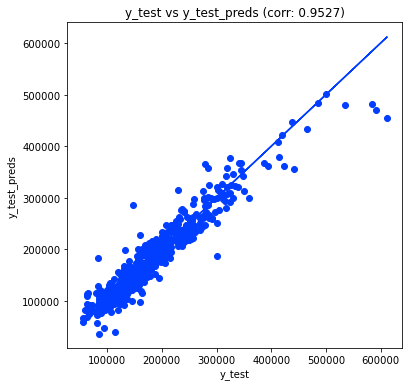

In [241]:
plt.figure(figsize=(6,6))

plt.scatter(x=y_test,y=y_test_preds)
cor = np.corrcoef(y_test,y_test_preds)
plt.plot(y_test,y_test)

plt.xlabel('y_test')
plt.ylabel('y_test_preds')
plt.title(f"y_test vs y_test_preds (corr: {cor[0][1].round(4)})");

#### Run Model with Log Sale Price

In [242]:
y_test,y_test_preds = linreg_log(X,y,0.3,True)

====== Linear Log Model ======
train r2: 0.9181513039528265
test_r2: 0.8961927428274621
mean cross val: [0.9103 0.9136 0.8834 0.9117 0.9107]
train rmse: 20348.6
test rmse: 21763.75


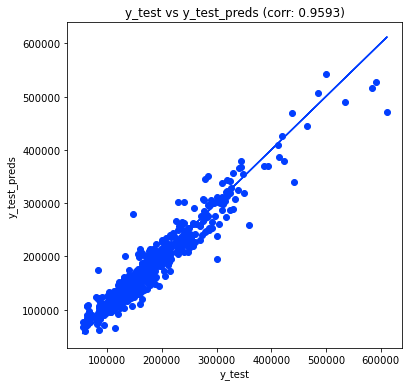

In [243]:
plt.figure(figsize=(6,6))

plt.scatter(x=y_test,y=y_test_preds)
cor = np.corrcoef(y_test,y_test_preds)
plt.plot(y_test,y_test)

plt.xlabel('y_test')
plt.ylabel('y_test_preds')
plt.title(f"y_test vs y_test_preds (corr: {cor[0][1].round(4)})");

====== Linear Log Model ======
- train r2: 0.9165754362032827
- test_r2: 0.9043008511707699
- mean cross val: [0.933  0.9006 0.8976 0.8861 0.9091]
- train rmse: 21038.62
- test rmse: 21206.24


## Test

In [244]:
# Previous kaggle columns

kaggle = ['lot_frontage', 'overall_quality', 'overall_condition', 'masonry_area',
          'central_air', 'bedroom_above_ground', 'kitchen_above_ground',
          'total_rooms_above_ground', 'functional', 'garage_cars', 'year_sold',
          'has_basement_sf', 'has_2nd_floor_sf', 'total_sf', 'all_bath',
          'has_open_porch', 'has_fireplace', 'has_wood_deck', 'log_lot_area',
          'external_quality_Fa', 'external_quality_Gd', 'external_quality_TA',
          'heating_quality_Fa', 'heating_quality_Gd', 'heating_quality_TA',
          'kitchen_quality_Gd', 'kitchen_quality_Ta', 'garage_fin_RFn',
          'garage_fin_Unf', 'lot_shape_Reg', 'building_type_2_fam_condo',
          'building_type_duplex', 'building_type_townhouse', 'house_style_2',
          'house_style_S', 'lot_slope_Not', 'condition_1_F', 'condition_1_N',
          'condition_1_P', 'condition_1_R', 'ms_zoning_Res', 'street_Pave',
          'sale_type_CON', 'sale_type_N', 'sale_type_W', 'sale_condition_Other',
          'sale_condition_P', 'lot_contour_level', 'masonry_type_N',
          'masonry_type_S', 'roof_style_H', 'roof_style_O']

print(len(kaggle))

52


In [245]:
X_test_all = X
lr = LinearRegression()
y_log = np.log(y)
lr.fit(X_test_all,y_log)

LinearRegression()

In [246]:
X_test_all.head(5)

,lot_frontage,street,lot_shape,lot_contour,lot_slope,overall_quality,overall_condition,masonry_area,central_air,bedroom_above_ground,...,ms_zoning_Res,sale_type_CON,sale_type_N,sale_type_W,sale_condition_Other,sale_condition_P,masonry_type_N,masonry_type_S,roof_style_H,roof_style_O
0,80.0,1,1,1,1,7,6,0.0,1,3,...,1,0,0,1,0,0,1,0,0,0
1,90.0,1,0,1,1,7,7,234.0,1,3,...,1,0,0,1,0,0,0,0,1,0
2,0.0,1,0,1,1,6,6,541.0,1,3,...,1,0,0,0,1,0,0,0,0,0
3,48.0,1,1,1,1,9,5,500.0,1,2,...,1,0,0,1,0,0,0,0,1,0
4,61.0,1,0,1,1,7,5,0.0,1,3,...,1,0,0,1,0,0,1,0,0,0


Go back up to import test and clean data

In [247]:
cols.remove('sale_price')
cols.remove('log_sale_price')

In [248]:
cols

['lot_frontage',
 'street',
 'lot_shape',
 'lot_contour',
 'lot_slope',
 'overall_quality',
 'overall_condition',
 'masonry_area',
 'central_air',
 'bedroom_above_ground',
 'kitchen_above_ground',
 'total_rooms_above_ground',
 'functional',
 'garage_cars',
 'year_sold',
 'has_2nd_floor_sf',
 'total_sf',
 'has_basement_sf',
 'total_bath',
 'has_open_porch',
 'has_fireplace',
 'has_wood_deck',
 'log_lot_area',
 'overall_sf',
 'external_quality',
 'heating_quality',
 'kitchen_quality',
 'garage_fin',
 'building_type',
 'house_style',
 'condition_1',
 'ms_zoning',
 'sale_type',
 'sale_condition',
 'masonry_type',
 'roof_style']

In [249]:
# Test

X = df[cols]

In [250]:
X = pd.get_dummies(columns=list(X.select_dtypes(include='object').columns), data = X, drop_first=True)

In [251]:
## dummied category only in train data
for col in set(X_test_all.columns) - set(X.columns):
    X[col] = 0
    
## dummied category only in test data
for col in set(X.columns) - set(X_test_all.columns):
    X.drop(col, axis=1, inplace=True)

In [252]:
X

,lot_frontage,street,lot_shape,lot_contour,lot_slope,overall_quality,overall_condition,masonry_area,central_air,bedroom_above_ground,...,ms_zoning_Res,sale_type_CON,sale_type_N,sale_type_W,sale_condition_Other,sale_condition_P,masonry_type_N,masonry_type_S,roof_style_H,roof_style_O
0,80.0,1,1,1,1,7,6,0.0,1,3,...,1,0,0,1,0,0,1,0,0,0
1,90.0,1,0,1,1,7,7,234.0,1,3,...,1,0,0,1,0,0,0,0,1,0
2,0.0,1,0,1,1,6,6,541.0,1,3,...,1,0,0,0,1,0,0,0,0,0
3,48.0,1,1,1,1,9,5,500.0,1,2,...,1,0,0,1,0,0,0,0,1,0
4,61.0,1,0,1,1,7,5,0.0,1,3,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,80.0,1,0,1,1,8,5,0.0,1,3,...,1,0,0,1,1,0,1,0,0,0
2193,70.0,1,1,1,1,5,4,88.0,1,3,...,1,0,0,1,1,0,0,0,0,0
2194,41.0,1,0,1,1,7,5,0.0,1,4,...,1,0,0,1,0,0,1,0,0,0
2195,85.0,1,1,1,1,5,5,0.0,0,2,...,1,0,0,0,1,0,1,0,0,0


In [253]:
y_pred = lr.predict(X)

In [254]:
y_pred_exp = np.exp(y_pred)

In [255]:
y_pred_exp[:10]

array([178317.87010318, 307822.75567589, 154456.55620492, 252351.60447497,
       165341.90444996, 131087.12208388, 118135.85704531, 208610.58057413,
       106091.28776256, 191675.08428785])

In [256]:
len(y_pred_exp)

2123

In [257]:
test = pd.read_csv('./datasets/test.csv')

In [258]:
test['Order']

0      2127
1       193
2      2407
3        46
4      2478
       ... 
728     453
729    1352
730     197
731    2850
732    2869
Name: Order, Length: 733, dtype: int64

In [259]:
pred_df = pd.DataFrame({'Order':test['Order'], 'SalePrice':y_pred_exp})
pred_df

ValueError: array length 2123 does not match index length 733

In [ ]:
pred_df.to_csv('submission.csv', index=False)

In [ ]:
X.columns

----